In [1]:
# importing files and dataset
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
student_por = pd.read_csv(r'data\student-por.csv', sep=';')
student_mat = pd.read_csv(r'data\student-mat.csv', sep=';')

In [2]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print("Number of Mathematics Student Data:",len(student_mat))
print("Number of Portuguese Student Data:",len(student_por))
list(student_mat)==list(student_por)

Number of Mathematics Student Data: 395
Number of Portuguese Student Data: 649


True

In [5]:
student_mat.dropna(inplace=True)
data = student_mat.copy()
# student_por.dropna(inplace=True)
# data = pd.concat([student_mat,student_por], axis=0)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


<AxesSubplot:>

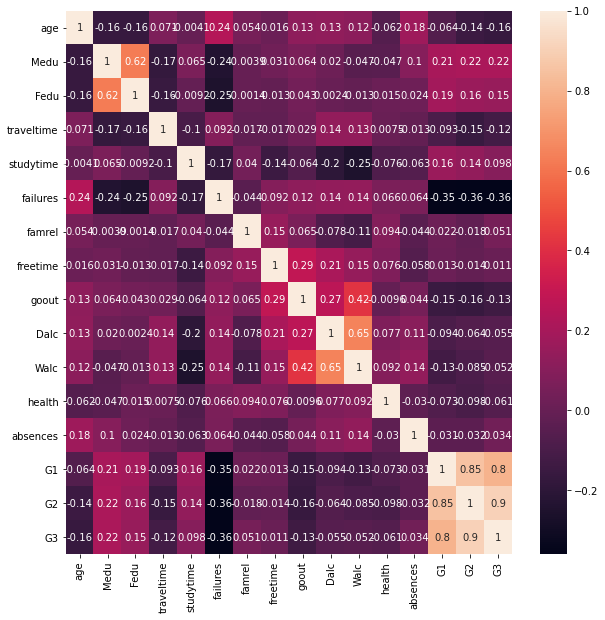

In [18]:
import seaborn as sns
corr_matrix=data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot=True)

In [7]:
# data preprocessing

#school
data.loc[data['school']=='GP','school'] = 0
data.loc[data['school']=='MS','school'] = 1
print('school: ',student_mat.school.unique(),' -> ',data.school.unique())

#sex
data.loc[data['sex']=='F','sex'] = 0
data.loc[data['sex']=='M','sex'] = 1
print('sex: ',student_mat.sex.unique(),' -> ',data.sex.unique())

#address
data.loc[data['address']=='U','address'] = 0
data.loc[data['address']=='R','address'] = 1
print('address: ',student_mat.address.unique(),' -> ',data.address.unique())

#family size 
data.loc[data['famsize']=='LE3','famsize'] = 0
data.loc[data['famsize']=='GT3','famsize'] = 1
print('famsize: ',student_mat.famsize.unique(),' -> ',data.famsize.unique())

#parent's cohabitaiion
data.loc[data['Pstatus']=='A','Pstatus'] = 0
data.loc[data['Pstatus']=='T','Pstatus'] = 1
print('Pstatus: ',student_mat.Pstatus.unique(),' -> ',data.Pstatus.unique())

#mother's job
data.loc[data['Mjob']=='at_home','Mjob'] = 0
data.loc[data['Mjob']=='teacher','Mjob'] = 1
data.loc[data['Mjob']=='health','Mjob'] = 2
data.loc[data['Mjob']=='services','Mjob'] = 3
data.loc[data['Mjob']=='other','Mjob'] = 4
print('Mjob: ',student_mat.Mjob.unique(),' -> ',data.Mjob.unique())

#father's job
data.loc[data['Fjob']=='at_home','Fjob'] = 0
data.loc[data['Fjob']=='teacher','Fjob'] = 1
data.loc[data['Fjob']=='health','Fjob'] = 2
data.loc[data['Fjob']=='services','Fjob'] = 3
data.loc[data['Fjob']=='other','Fjob'] = 4
print('Mjob: ',student_mat.Fjob.unique(),' -> ',data.Fjob.unique())

#reason
data.loc[data['reason']=='home','reason'] = 0
data.loc[data['reason']=='reputation','reason'] = 1
data.loc[data['reason']=='course','reason'] = 2
data.loc[data['reason']=='other','reason'] = 3
print('reason: ',student_mat.reason.unique(),' -> ',data.reason.unique())

#guardian
data.loc[data['guardian']=='mother','guardian'] = 0
data.loc[data['guardian']=='father','guardian'] = 1
data.loc[data['guardian']=='other','guardian'] = 2
print('guardian: ',student_mat.guardian.unique(),' -> ',data.guardian.unique())

#school support
data.loc[data['schoolsup']=='no','schoolsup'] = 0
data.loc[data['schoolsup']=='yes','schoolsup'] = 1
print('schoolsup: ',student_mat.schoolsup.unique(),' -> ',data.schoolsup.unique())

#family support
data.loc[data['famsup']=='no','famsup'] = 0
data.loc[data['famsup']=='yes','famsup'] = 1
print('famsup: ',student_mat.famsup.unique(),' -> ',data.famsup.unique())

#paid
data.loc[data['paid']=='no','paid'] = 0
data.loc[data['paid']=='yes','paid'] = 1
print('paid: ',student_mat.paid.unique(),' -> ',data.paid.unique())

#activities
data.loc[data['activities']=='no','activities'] = 0
data.loc[data['activities']=='yes','activities'] = 1
print('activities: ',student_mat.activities.unique(),' -> ',data.activities.unique())

#nursery
data.loc[data['nursery']=='no','nursery'] = 0
data.loc[data['nursery']=='yes','nursery'] = 1
print('nursery: ',student_mat.nursery.unique(),' -> ',data.nursery.unique())

#higher edu
data.loc[data['higher']=='no','higher'] = 0
data.loc[data['higher']=='yes','higher'] = 1
print('higher: ',student_mat.higher.unique(),' -> ',data.higher.unique())

#internet 
data.loc[data['internet']=='no','internet'] = 0
data.loc[data['internet']=='yes','internet'] = 1
print('internet: ',student_mat.internet.unique(),' -> ',data.internet.unique())

#romantic 
data.loc[data['romantic']=='no','romantic'] = 0
data.loc[data['romantic']=='yes','romantic'] = 1
print('romantic: ',student_mat.romantic.unique(),' -> ',data.romantic.unique())


school:  ['GP' 'MS']  ->  [0 1]
sex:  ['F' 'M']  ->  [0 1]
address:  ['U' 'R']  ->  [0 1]
famsize:  ['GT3' 'LE3']  ->  [1 0]
Pstatus:  ['A' 'T']  ->  [0 1]
Mjob:  ['at_home' 'health' 'other' 'services' 'teacher']  ->  [0 2 4 3 1]
Mjob:  ['teacher' 'other' 'services' 'health' 'at_home']  ->  [1 4 3 2 0]
reason:  ['course' 'other' 'home' 'reputation']  ->  [2 3 0 1]
guardian:  ['mother' 'father' 'other']  ->  [0 1 2]
schoolsup:  ['yes' 'no']  ->  [1 0]
famsup:  ['no' 'yes']  ->  [0 1]
paid:  ['no' 'yes']  ->  [0 1]
activities:  ['no' 'yes']  ->  [0 1]
nursery:  ['yes' 'no']  ->  [1 0]
higher:  ['yes' 'no']  ->  [1 0]
internet:  ['no' 'yes']  ->  [0 1]
romantic:  ['no' 'yes']  ->  [0 1]


In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,0,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,0,4,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,0,4,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
xtrain

array([[0, 1, 16, ..., 2, 12, 13],
       [0, 1, 16, ..., 0, 13, 14],
       [0, 0, 16, ..., 0, 8, 7],
       ...,
       [0, 0, 19, ..., 15, 9, 9],
       [0, 0, 17, ..., 0, 13, 15],
       [0, 1, 15, ..., 4, 10, 13]], dtype=object)

In [12]:
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)

In [13]:
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
print('Linear Regression:')
print('mean ablsolute error: ',metrics.mean_absolute_error(ytest,ypred))
print('mean quared error: ',metrics.mean_squared_error(ytest,ypred))
print('root mean quared error: ',np.sqrt(metrics.mean_squared_error(ytest,ypred)))
r2_score(ytest,regressor.predict(xtest))

Linear Regression:
mean ablsolute error:  1.5841249648350444
mean quared error:  5.490233810304901
root mean quared error:  2.3431247961440085


0.7322496389045035

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)

In [15]:
print('DecisionTreeClassifier:')
print('mean ablsolute error: ',metrics.mean_absolute_error(ytest,ypred))
print('mean quared error: ',metrics.mean_squared_error(ytest,ypred))
print('root mean quared error: ',np.sqrt(metrics.mean_squared_error(ytest,ypred)))
r2_score(ytest,clf.predict(xtest))


DecisionTreeClassifier:
mean ablsolute error:  1.6835443037974684
mean quared error:  8.721518987341772
root mean quared error:  2.953221797857684


0.574664770418529

In [16]:
#Sample input
regressor.predict(np.array([0, 1, 16, 0, 1, 1, 3, 3, 3, 4, 0, 0, 1, 2, 0, 0, 0,
1, 1, 1, 1, 1, 1, 4, 2, 3, 1, 2, 3, 2, 12, 13]).reshape(1, -1))

array([11.77627218])

In [17]:
#Serialized representation
import pickle
model = 'LinearRegressionModel.sav'
pickle.dump(regressor, open(model, 'wb'))